In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\mushroom_cleaned.csv")
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [4]:
df.rename(columns={"class":"Classes"},inplace = True)

In [5]:
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,Classes
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [6]:
df.Classes.unique()

array([1, 0], dtype=int64)

In [7]:
df.season.unique()

array([1.80427271, 0.94319455, 0.88845029, 0.02737213])

In [8]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
Classes            0
dtype: int64

In [9]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'Classes'],
      dtype='object')

In [10]:
X = df[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'season']]
y = df['Classes']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
# print the intercept
print(lm.intercept_)

0.8624616774293359


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cap-diameter,-0.000088
cap-shape,-0.019089
gill-attachment,-0.000165
gill-color,-0.002190
stem-height,0.154846
stem-width,-0.000069
stem-color,-0.014575
season,-0.096612


In [17]:
predictions = lm.predict(X_test)

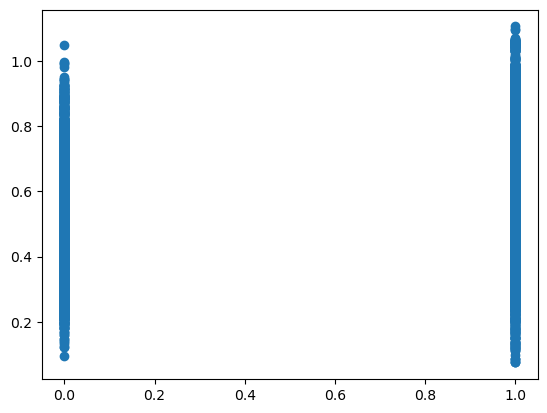

In [18]:
plt.scatter(y_test,predictions)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


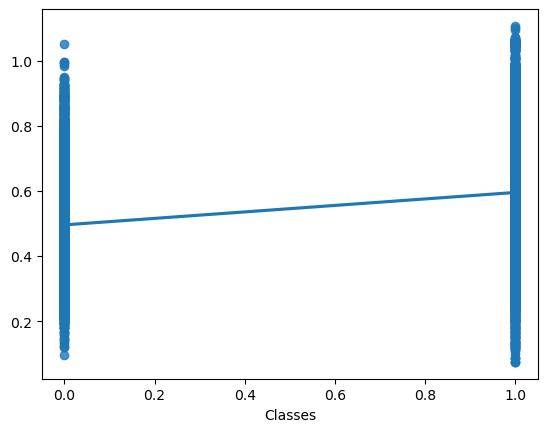

In [19]:
sns.regplot(y_test,predictions)
plt.show()

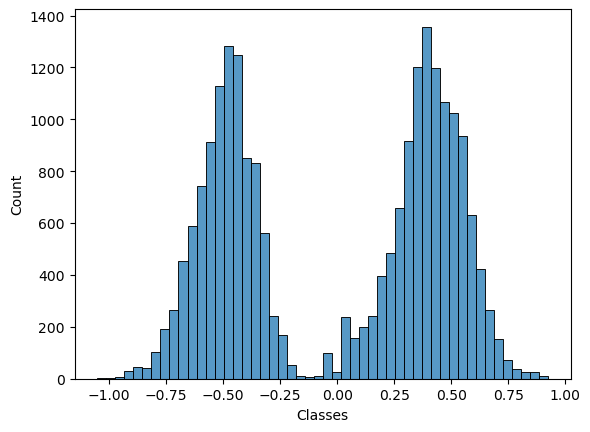

In [20]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


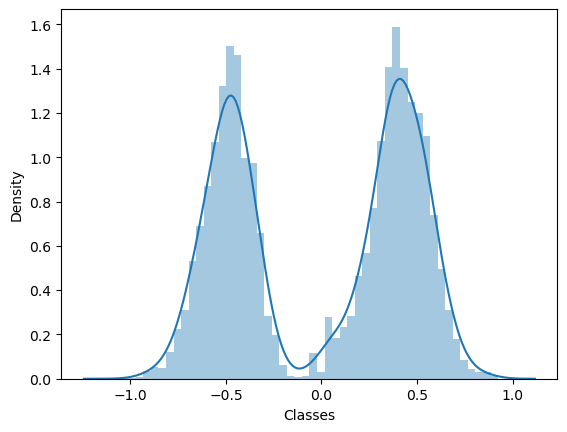

In [21]:
sns.distplot((y_test-predictions),bins=50);
plt.show()

In [22]:
error= y_test-predictions
error

27399    0.454889
8876     0.396059
41800   -0.420804
48720   -0.447514
10980    0.500359
           ...   
42995    0.198699
44118   -0.339628
6827     0.283327
51277    0.287602
17928   -0.550121
Name: Classes, Length: 21614, dtype: float64

In [23]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

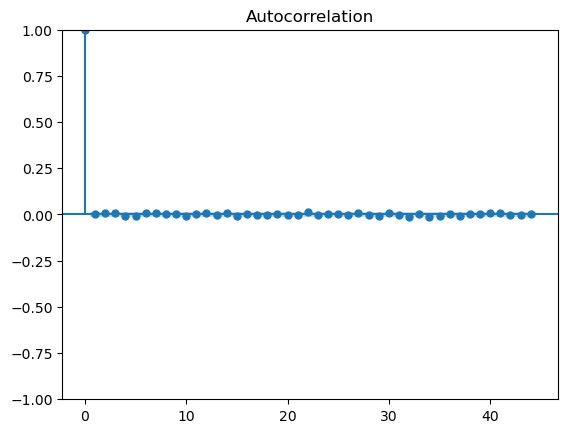

In [24]:
acf=plot_acf(error)
plt.show()

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.446353226832209
MSE: 0.22225323702338767
RMSE: 0.47143741580764215


In [27]:
from sklearn.metrics import classification_report

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()#initialization
logmodel.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      7312
           1       0.66      0.66      0.66      8899

    accuracy                           0.62     16211
   macro avg       0.62      0.62      0.62     16211
weighted avg       0.62      0.62      0.62     16211



In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[4201, 3111],
       [2988, 5911]], dtype=int64)

### DecisionTree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
lm = DecisionTreeClassifier()

In [45]:
lm.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
predictions = lm.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7312
           1       0.98      0.98      0.98      8899

    accuracy                           0.98     16211
   macro avg       0.98      0.98      0.98     16211
weighted avg       0.98      0.98      0.98     16211



In [48]:
confusion_matrix(y_test,predictions)

array([[7091,  221],
       [ 175, 8724]], dtype=int64)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfm = RandomForestClassifier(n_estimators=50)

In [56]:
rfm.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [57]:
predictions = rfm.predict(X_test)

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7312
           1       0.99      0.99      0.99      8899

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



In [59]:
confusion_matrix(y_test,predictions)

array([[7233,   79],
       [  86, 8813]], dtype=int64)